In [1]:
import pandas as pd
import os

In [2]:
df = pd.DataFrame()
for adress, name_folder, files in os.walk('c:\\temp\\4_data\\data\\'):
    if files != []:
        name_csv = adress + '\\' + files[0]
        adr_split = adress.split('\\')
        df_csv = pd.read_csv(name_csv, delimiter=',', encoding='Windows-1251')
        df_csv['name'] = adr_split[5]
        df_csv['date'] = adr_split[4]
        df = pd.concat([df, df_csv])
        df = df.reset_index(drop=True)

In [3]:
df.head()

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03


In [4]:
df.tail()

,Unnamed: 0,product_id,quantity,name,date
156,1,66,4,Rostislav_Petrov,2020-12-09
157,2,39,2,Rostislav_Petrov,2020-12-09
158,0,82,4,Vasiliy_Ivanov,2020-12-09
159,1,74,2,Vasiliy_Ivanov,2020-12-09
160,2,54,3,Vasiliy_Ivanov,2020-12-09


In [5]:
df.quantity.sum()

480

In [6]:
df.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
      ..
156    1
157    2
158    0
159    1
160    2
Name: Unnamed: 0, Length: 161, dtype: int64

In [7]:
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [16]:
df_dupl = df.groupby(['name','product_id','date'],as_index=False).agg({'quantity':'sum'})

In [17]:
df_dupl.head()

,name,product_id,date,quantity
0,Alexey_Fedorov,13,2020-12-05,2
1,Alexey_Fedorov,15,2020-12-07,1
2,Alexey_Fedorov,18,2020-12-08,2
3,Alexey_Fedorov,34,2020-12-08,1
4,Alexey_Fedorov,50,2020-12-05,2


In [18]:
df_dupl = df_dupl.groupby(['name','product_id'],as_index=False).agg({'date':'count'}).rename(columns={'date':'count_date'})

In [19]:
df_dupl.head()

,name,product_id,count_date
0,Alexey_Fedorov,13,1
1,Alexey_Fedorov,15,1
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
4,Alexey_Fedorov,50,1


In [20]:
df_dupl.query('count_date > 1')

,name,product_id,count_date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [9]:
df_count_q = df.groupby('name',as_index=False).agg({'quantity':'sum'})

In [12]:
df_count_q.sort_values('quantity',ascending=False).head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [17]:
df_top_prod = df.groupby('product_id',as_index=False).agg({'quantity':'sum'})

In [18]:
df_top_prod = df_top_prod.sort_values('quantity',ascending=False).head(10)

In [19]:
df_top_prod

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [20]:
import seaborn as sns

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

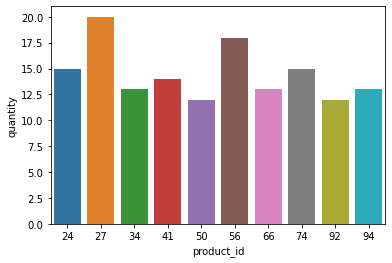

In [22]:
sns.barplot(data=df_top_prod, x='product_id', y='quantity')

In [23]:
df_date = df.groupby('date',as_index=False).agg({'quantity':'sum'})

In [24]:
df_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

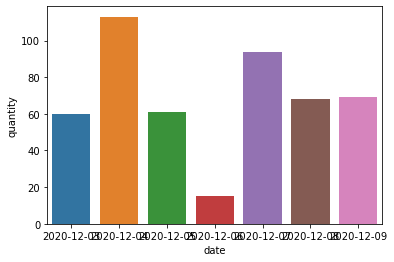

In [25]:
sns.barplot(data=df_date, x='date', y='quantity')